<a href="https://colab.research.google.com/github/LukeBlanch/CAP4630-Artificial-Intelligence/blob/master/HW_2/HW_2_Problem_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2 Problem 2:
## Luke Blanchard


## Imports

In [0]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Generate random data

In [0]:
# generate m random pairs (x, y)

m = 150
X = 2 * np.random.rand(m, 1)
y = 1 + 5 * X + np.random.rand(m, 1)

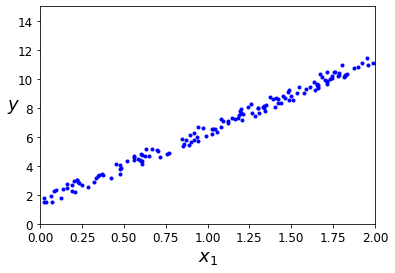

In [121]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [0]:
# add x0 = 1 
X_b = np.column_stack([np.ones((m, 1)), X])

In [0]:
# create array with x1=0 and x1=2
X_new = np.array([[0], [2]])
# add x0 = 1 to each instance
X_new_b = np.column_stack([np.ones((2, 1)), X_new])

# Linear regression using mini-batch gradient descent

In [0]:
# number of epochs
epochs = 20
# learning rate
lr = 0.01
# fix initial random weight
np.random.seed(42)
initial_weight = np.random.randn(2, 1) 

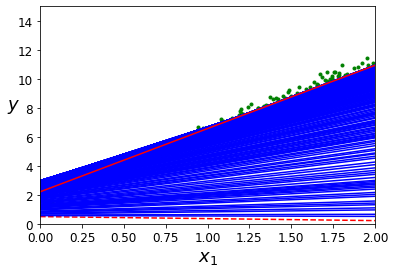

In [125]:
weight = initial_weight
weight_path_mgd = []
batch_size = 4

# Plot training data
plt.plot(X, y, "g.")

# Plot initial prediction
y_predict = X_new_b.dot(weight)
plt.plot(X_new, y_predict, "r--")

weight_path_mgd.append(weight)
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]

    for i in range(0, m, batch_size):
        xi = X_b_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        gradient = 1 / batch_size * xi.T.dot(xi.dot(weight) - yi)
        weight = weight - lr * gradient
        weight_path_mgd.append(weight)

        y_predict = X_new_b.dot(weight)
        plt.plot(X_new, y_predict, "b-")

plt.plot(X_new, y_predict, "r-")
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                                              
plt.show()   

In [126]:
weight_path_mgd[-1]

array([[2.20755196],
       [4.36116068]])